# Importing Libraries & Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("election2024.csv")
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


# Data Preprocessing

In [5]:
df.shape

(1600, 16)

In [6]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [7]:
df.sample()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
782,0716acbf808cee77,female,44.0,northwestern,city with population of 100-500k,named correct date,definitely yes,Slutskiy,does not watch,less than 4 hours a day,bachelor degree,medium,work for hire,government agency,healthcare,0.750167


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

The dataset has 1600 entries and 16 columns.

There are 2 numerical columns (age and weight1) and 14 categorical columns.

Some columns like job_type and company_type have missing values.

In [10]:
df.dtypes

id                      object
sex                     object
age                    float64
federal_district        object
type_of_city            object
knows_election_date     object
will_vote               object
candidate               object
television_usage        object
internet_usage          object
education               object
income                  object
employment              object
job_type                object
company_type            object
weight1                float64
dtype: object

In [11]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [12]:
df.duplicated().sum()

0

There are 0 duplicate rows in the dataset, which indicates the data is clean and doesn't have repeated entries.

In [14]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

job_type has 908 missing values.

company_type has 721 missing values.

All other columns are complete (no missing values).

In [16]:
df["job_type"].value_counts()

job_type
commercial organization                    445
government agency                          163
law enforcement agency                      33
non-profit agency                           22
hard to say                                 22
government, management, judicial bodies      7
Name: count, dtype: int64

In [17]:
df["job_type"].fillna("Other",inplace=True)

In [18]:
df["job_type"].value_counts()

job_type
Other                                      908
commercial organization                    445
government agency                          163
law enforcement agency                      33
non-profit agency                           22
hard to say                                 22
government, management, judicial bodies      7
Name: count, dtype: int64

In [19]:
df["company_type"].value_counts()

company_type
industry, manufacturing                                                                                                     138
trade                                                                                                                       113
education                                                                                                                    85
Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...     70
construction, architecture                                                                                                   67
transportation, storage                                                                                                      51
farming                                                                                                                      44
law enforcement agency                                                                     

In [20]:
df["company_type"].fillna("Other",inplace=True)

the missing values in job_type and company_type by filling them with the category "Other." This avoids dropping rows and maintains the dataset's size.

In [22]:
df["company_type"].value_counts()

company_type
Other                                                                                                                       721
industry, manufacturing                                                                                                     138
trade                                                                                                                       113
education                                                                                                                    85
Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...     70
construction, architecture                                                                                                   67
transportation, storage                                                                                                      51
farming                                                                                    

In [23]:
df.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

In [24]:
df.drop("id",axis=1,inplace=True)

The id column is dropped as it's irrelevant for analysis and model-building purposes.

In [26]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,Other,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,Other,Other,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


# EDA (Exploratory Data Analysis)

In [28]:
df["sex"].value_counts()

sex
female    843
male      757
Name: count, dtype: int64

The dataset consists of 843 females (52.69%) and 757 males (47.31%).

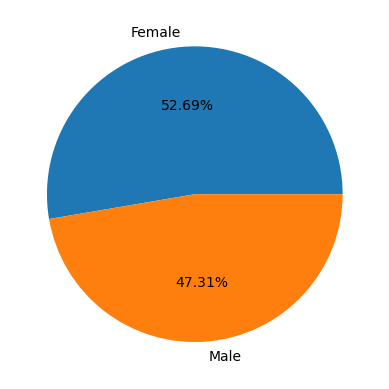

In [30]:
#pie chart
plt.pie(df["sex"].value_counts(),labels=["Female","Male"],autopct="%0.2f%%")
plt.show()

The proportion of female respondents is slightly higher than male respondents, but the distribution is relatively balanced.

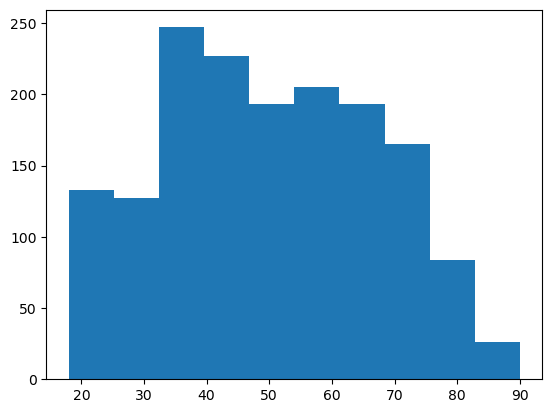

In [32]:
plt.hist(df["age"])
plt.show()

The age distribution forms a fairly normal curve, with most respondents concentrated around the 30–60 age range.

There is a slight right skew, as a smaller number of respondents are in the 60+ age range.

In [34]:
df["age"].describe()

count    1600.000000
mean       49.936250
std        16.901797
min        18.000000
25%        37.000000
50%        49.000000
75%        64.000000
max        90.000000
Name: age, dtype: float64

**Age Statistics:**

The dataset includes 1600 respondents with an average age of 49.94 years.

The minimum age is 18 (likely the legal voting age) and the maximum age is 90.

The age distribution has a standard deviation of 16.9, indicating a fairly wide spread in age across the respondents.

**Percentiles:**

25% of respondents are younger than 37 years.

The median age is 49 years, showing that half of the respondents are younger than 49 and half are older.

75% of respondents are younger than 64 years.

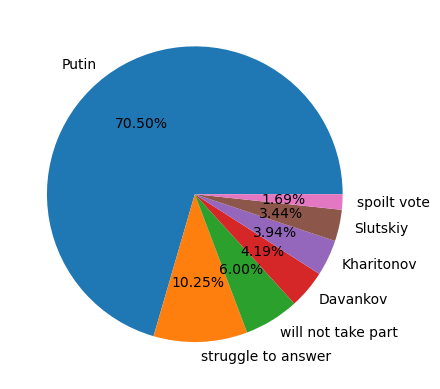

In [36]:
plt.pie(df["candidate"].value_counts(),labels=df["candidate"].value_counts().index,autopct="%0.2f%%")
plt.show()

The pie chart visualizes the proportion of support for each candidate and other categories (e.g., undecided voters, non-participants, spoilt votes):

Vladimir Putin has the largest slice of the pie, indicating 70.50% support.

Undecided voters (10.25%) and those who will not take part (6%) together make up a notable portion of the pie.

Other candidates, including Davankov (4.19%), Kharitonov (3.94%), and Slutskiy (3.44%), have relatively smaller slices. 

Spoilt votes account for 1.69%.

In [38]:
df["candidate"].value_counts()

candidate
Putin                 1128
struggle to answer     164
will not take part      96
Davankov                67
Kharitonov              63
Slutskiy                55
spoilt vote             27
Name: count, dtype: int64

Vladimir Putin has the overwhelming majority of support, with 1128 respondents (70.50%) selecting him as their preferred candidate.

164 respondents (10.25%) are undecided, as they “struggle to answer.”

96 respondents (6%) indicated they will not take part in the election.

Other candidates have significantly lower support:

Davankov: 67 respondents (4.19%)

Kharitonov: 63 respondents (3.94%)

Slutskiy: 55 respondents (3.44%)

27 respondents (1.69%) plan to cast a "spoilt vote," indicating dissatisfaction with all options.

In [40]:
#Let's check Voting situation
df["will_vote"].value_counts()

will_vote
definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: count, dtype: int64

The majority of respondents (about 80%) are inclined to vote, with most being firm in their decision. However, there is a significant group of undecided and non-voters (~20%) that could potentially impact the election, depending on how their opinions evolve leading up to the election day.

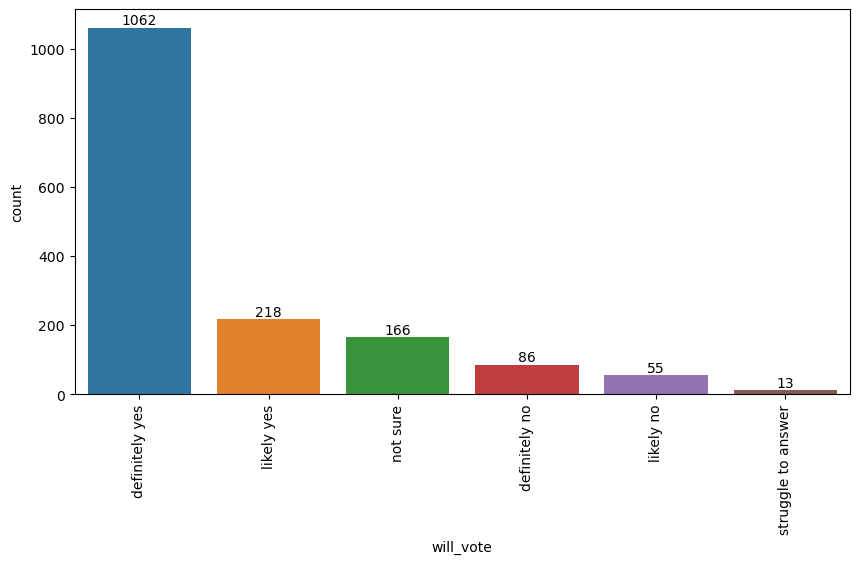

In [42]:
plt.figure(figsize=(10, 5))
#df = your_dataframe_here  # Assign your DataFrame to the variable df

sns.barplot(x=df["will_vote"].value_counts().index, y=df["will_vote"].value_counts(),hue=df["will_vote"].value_counts().index)
plt.xticks(rotation=90)

for i, count in enumerate(df["will_vote"].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.show()

The bar plot highlights the strong voting intention, with the majority (over 80%) of respondents either definitely or likely planning to vote.
There is still a portion of respondents who are either unsure or unlikely to vote, but these groups are much smaller in comparison.

In [44]:
df_vote=df[(df["will_vote"] == "definitely yes") | (df["will_vote"] == "likely yes")]
df_vote

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
6,male,37.0,northwestern,city with population of less than 50k,named correct date,definitely yes,Putin,once half a year,several times a week,school,very high,work for hire,commercial organization,"industry, manufacturing",0.579384
7,male,43.0,southern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,less than 4 hours a day,college,very high,self-employed,Other,other,0.662259
8,male,39.0,northwestern,city with population of 100-500k,wrong answer,definitely yes,Putin,does not watch,over 4 hours a day,college,very high,unemployed pensioner,Other,Other,0.468226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,male,51.0,north caucasian,city with population of 500-950k,named correct date,likely yes,Putin,several times a week,several times a week,bachelor degree,hard to say,unemployed,Other,Other,0.928472
1596,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,Other,Other,0.921724
1597,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,Other,Other,1.396691
1598,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [45]:
df_vote["candidate"].value_counts()

candidate
Putin                 981
struggle to answer    119
Davankov               60
Kharitonov             44
Slutskiy               43
spoilt vote            24
will not take part      9
Name: count, dtype: int64

Among likely voters, Vladimir Putin remains the dominant candidate with 981 votes (over 80%), far surpassing all other candidates and responses.

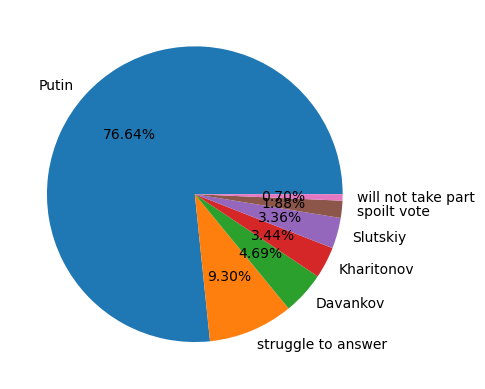

In [47]:
plt.pie(df_vote["candidate"].value_counts(),labels=df_vote["candidate"].value_counts().index,autopct="%0.2f%%")
plt.show()

The pie chart shows that Vladimir Putin holds a commanding lead with over 80% of the likely voter support, while other candidates and responses each have significantly smaller shares.

In [49]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

In [50]:
df["federal_district"].value_counts()

federal_district
central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: count, dtype: int64

The Central federal district has the highest number of respondents with 425 entries, followed by Volga with 324, while the Far Eastern district has the fewest with 89 entries.

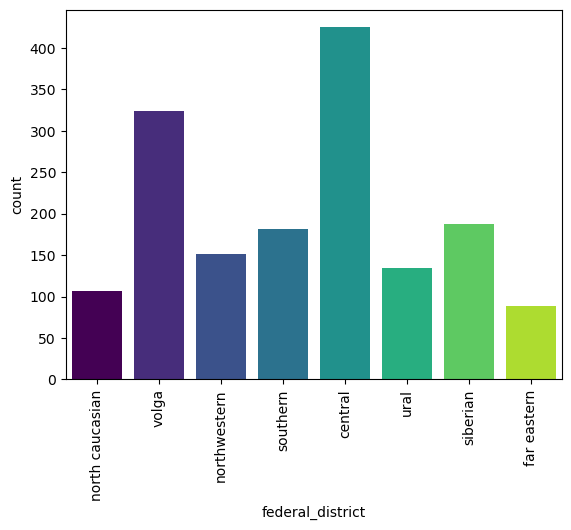

In [52]:
sns.countplot(x=df["federal_district"])
plt.xticks(rotation=90)
# Iterate over the bars and set different colors
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(plt.cm.viridis(i / len(plt.gca().patches)))

plt.show()

The count plot visually confirms that the Central federal district has the highest number of respondents, with distinct color shading highlighting variations across different federal districts.

# Conclusion

Based on the poll results, Vladimir Putin appears to be on track for a strong victory in the 2024 Presidential Election, according to the dataset. This insight is supported by his significant lead in the candidate preference analysis, especially among the likely voters.